In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

In [2]:
#path = '/Users/Nidhi/Downloads/'
X = np.load('q2xTrain.npy')  
N = X.shape[0]    
X_p = np.ones((20,1))
X = X.reshape((20,1))
#print(X.shape)
Y = np.load('q2yTrain.npy')  
print(Y.shape)
X = np.concatenate((X_p, X), axis=1)
w = np.zeros((X.shape[1],))
h = np.dot(X,w)
X_trans = X.transpose()
z = h - Y
gradient=np.dot(X_trans,z)
#print(gradient.shape)

hessian = np.dot(X_trans, X)
#print(np.linalg.inv(hessian).dot(gradient))
h_what = np.linalg.inv(hessian)

(20,)


In [3]:
def mse(W1, X, Y):
    mse=((X.dot(W1)-Y)**2).mean()
    return mse

In [4]:
def BatchGradientDescent(X,y,w,n):
    X_trans=X.transpose()
    tol = np.Infinity
    w = np.zeros((X.shape[1],))
    i1=0
    while mse(w, X, y) > 0.2:
        h=np.dot(X,w)
        z=h-y
        gradient=np.dot(X_trans,z)
        w_new=w-n*gradient
        #h_new = np.dot(X,w)
        #tol = np.linalg.norm(h_new - h)
        tol = np.linalg.norm(w_new - w)
        w = w_new
        i1+=1
    print('The number of iterations for Batch Gradient Descent is %i' %i1)
    print("The weights for Batch Gradient Descent are")
    print(w)
    return w

In [5]:
BatchGradientDescent(X,Y,w,n=0.01)

The number of iterations for Batch Gradient Descent is 281
The weights for Batch Gradient Descent are
[ 1.88034459 -2.68964226]


array([ 1.88034459, -2.68964226])

In [6]:
def StochasticGradientDescent(X,y,w,n):
    X_trans = X.transpose()
    tol = np.Infinity
    i2=0
    w = np.zeros((X.shape[1],))
    while mse(w, X, y) > 0.2:
        for p in range(0,X.shape[0]):
            q = np.random.randint(0,X.shape[0])
            h = np.dot(X[q],w)
            z = h-y[q]
            gradient = np.dot(X_trans[:,q],z)
            #print(gradient.shape, z)
            w = w-n * gradient
            h_new = np.dot(X[q],w)
            tol = np.linalg.norm(h_new - h)
        i2+=1
    print('The number of iterations for Stochastic Gradient Descent is %i' %i2) 
    print("The weights for Stochastic Gradient Descent are")
    print(w)
    return w

In [7]:
StochasticGradientDescent(X,Y,w,n= 0.01)

The number of iterations for Stochastic Gradient Descent is 311
The weights for Stochastic Gradient Descent are
[ 1.88673012 -2.69530864]


array([ 1.88673012, -2.69530864])

In [8]:
def NewtonMethod(X,y,w):
    X_trans = X.transpose()
    hessian = np.dot(X_trans,X)
    tol = np.Infinity
    i3=0
    while mse(w, X, y) > 0.2:
        old_w = w
        h=np.dot(X,w)
        z=h-y
        gradient=np.dot(X_trans,z)
        w = old_w - np.linalg.pinv(hessian).dot(gradient)
        h_new = np.dot(X,w)
        tol = np.linalg.norm(h_new - h)
        i3+=1
    print('The number of iterations for Newtons Method is %i' %i3)
    print("The weights for Newtons Method are")
    print(w)
    return w

In [9]:
#Question 2(a)
BatchGradientDescent(X,Y,w,n=0.01)
StochasticGradientDescent(X,Y,w,n= 0.01)
NewtonMethod(X,Y,w)

The number of iterations for Batch Gradient Descent is 281
The weights for Batch Gradient Descent are
[ 1.88034459 -2.68964226]
The number of iterations for Stochastic Gradient Descent is 270
The weights for Stochastic Gradient Descent are
[ 1.90118757 -2.69986519]
The number of iterations for Newtons Method is 1
The weights for Newtons Method are
[ 1.9468968  -2.82417908]


array([ 1.9468968 , -2.82417908])

The weights for the 0 degree polynomial is
[0.62693881]
The weights for the 1 degree polynomial is
[ 1.9468968  -2.82417908]
The weights for the 2 degree polynomial is
[ 2.02881908 -3.31190607  0.5099073 ]
The weights for the 3 degree polynomial is
[  0.72143522  10.6925568  -34.25867044  23.73399256]
The weights for the 4 degree polynomial is
[  0.31700758  17.19240855 -61.74347052  65.73372287 -21.02990396]
The weights for the 5 degree polynomial is
[  0.68631137   9.14396164 -11.21978608 -63.12577688 121.42886106
 -56.75278845]
The weights for the 6 degree polynomial is
[   1.17337103   -3.85879113   99.39182601 -482.12388673  902.44548997
 -756.24366056  240.00499352]
The weights for the 7 degree polynomial is
[ 4.82561175e-01  1.88010755e+01 -1.55273420e+02  8.50251051e+02
 -2.73875214e+03  4.59786346e+03 -3.76771954e+03  1.19660229e+03]
The weights for the 8 degree polynomial is
[ 3.84923551e-01  2.26064519e+01 -2.08301610e+02  1.20568440e+03
 -4.03819931e+03  7.32669536e+03 -7.0

Text(0, 0.5, 'Erms')

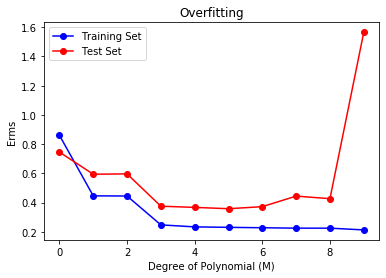

In [10]:
#Q2(b)
# path = '/Users/Nidhi/Downloads/'
X = np.load('q2xTrain.npy')  
Y = np.load('q2yTrain.npy')  
X_test = np.load('q2xTest.npy')  
Y_test = np.load('q2yTest.npy')
E_rms = np.zeros(10)
E_rms_test = np.zeros(10)
j = 0
for M in range(1,11):
    X_new = np.flip(np.vander(X,M), axis = 1)
    X_new_test = np.flip(np.vander(X_test,M), axis = 1)
    w = np.zeros((X_new.shape[1]))
    X_trans = X_new.transpose()
    hessian = np.dot(X_trans,X_new)
    tol = np.Infinity
    while tol > 1e-5:
        old_w = w.copy()
        h=np.dot(X_new,w)
        z=h-Y
        gradient=np.dot(X_trans,z)
        w = old_w - np.linalg.pinv(hessian).dot(gradient)
        #w = old_w - np.linalg.inv(X_new.T.dot(X_new)).dot((X_new.T).dot(X_new.dot(w)-Y))
        h_new = np.dot(X_new,w)
        tol = np.linalg.norm(h_new - h)
    #print(w.shape, X_new)
    h_new_test = np.dot(X_new_test,w)
    E_w_test = np.linalg.norm(h_new_test - Y_test)
    E_w = np.linalg.norm(h_new - Y)
    E_rms[M-1] = E_w/np.sqrt(X_new.shape[0])
    E_rms_test[M-1] = E_w_test/np.sqrt(X_new_test.shape[0])
    #print(E_rms_test)
    print('The weights for the %i degree polynomial is' %j)
    print(w)
    j += 1
#print(X_new.shape)
#print(E_rms)
#print(E_rms_test)
plt.title('Overfitting')
plt.plot(range(10), E_rms, 'ob-', label = 'Training Set')
plt.plot(range(10), E_rms_test, 'or-', label = 'Test Set')
plt.legend()
plt.xlabel('Degree of Polynomial (M)')
plt.ylabel('Erms')


In [11]:
#path = '/Users/Nidhi/Downloads/'
Xreg = np.load('q2xTrain.npy')  
Yreg = np.load('q2yTrain.npy')  
Xtest = np.load('q2xTest.npy')  
Ytest = np.load('q2yTest.npy')

The weights for a 9th degree polynomial with regularization parameter 0.000000
[ 6.35099301e+00 -2.30843512e+02  3.77339470e+03 -3.00383303e+04
  1.35360464e+05 -3.68462356e+05  6.16055234e+05 -6.17628406e+05
  3.40252385e+05 -7.91054979e+04]
The weights for a 9th degree polynomial with regularization parameter 0.000001
[  0.67778364   9.26697861 -13.10679556 -43.55076818  44.4067339
  50.20791682  -7.66810429 -52.1792701  -36.03023406  48.87151966]
The weights for a 9th degree polynomial with regularization parameter 0.000010
[  0.59106034  11.58939844 -30.01201196  -0.61146409  20.93512034
  13.97639282  -3.13002479 -13.13277559  -8.93475101   8.99366139]
The weights for a 9th degree polynomial with regularization parameter 0.000100
[  0.76397647   9.18088699 -22.62646106  -2.26667382  10.25041855
  10.18741054   4.7031529   -0.87709574  -4.28496401  -5.14799425]
The weights for a 9th degree polynomial with regularization parameter 0.001000
[  1.14781374   4.96043921 -13.02789327  -3

C:\Users\Nidhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
C:\Users\Nidhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log


Text(0.5, 0, 'ln(lambda)')

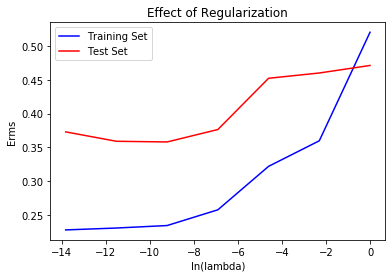

In [12]:
#Q2(c)
l = [0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
j =0
E_rms=np.zeros((8), dtype=np.float64)
E_rms_test=np.zeros((8), dtype=np.float64)
for i in l:
    Xnew = np.flip(np.vander(Xreg,10), axis = 1)
    Xnewtest = np.flip(np.vander(Xtest,10), axis = 1)
    w = np.zeros((Xnew.shape[1]))
    Xtrans = Xnew.transpose()
    hessian = np.dot(Xtrans,Xnew) + i*np.eye(w.shape[0])
    tol = np.Infinity
    while tol > 1e-5:
        old_w = w.copy()
        h=np.dot(Xnew,w)
        z=h-Yreg
        gradient=np.dot(Xtrans,z) + i*old_w
        w = old_w - np.linalg.pinv(hessian).dot(gradient)
        #w = old_w - np.linalg.inv(X_new.T.dot(X_new)).dot((X_new.T).dot(X_new.dot(w)-Y))
        h_new = np.dot(Xnew,w)
        tol = np.linalg.norm(h_new - h)
        h_new_test = np.dot(Xnewtest,w)
    E_w_test = np.linalg.norm(h_new_test - Ytest)
    E_w = np.linalg.norm(h_new - Yreg)
    #print(E_w/np.sqrt(Xnew.shape[0]))
    #print(l.index(i))
    #print(l.index(i))
    E_rms[j] = E_w/np.sqrt(Xnew.shape[0])
    E_rms_test[j] = E_w_test/np.sqrt(Xnewtest.shape[0])
    j+=1
    print('The weights for a 9th degree polynomial with regularization parameter %f' %i)
    print(w)
#print(j)
#print(E_rms)
plt.plot(np.log(l), E_rms, 'b-', label = 'Training Set')
plt.plot(np.log(l), E_rms_test, 'r-', label = 'Test Set')
plt.title('Effect of Regularization')
plt.legend()
plt.ylabel('Erms')
plt.xlabel ('ln(lambda)')